In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

from Model import Classifier
from Model import get_device

In [3]:


path_to_train_and_val = "/home/i.karakulin/Classification-of-the-Simpsons/simpsons dataset/data/dataset"
path_to_testset = "/home/i.karakulin/Classification-of-the-Simpsons/simpsons dataset/data/testset"

device = get_device()
model = Classifier(device)

# model.train(
#     path_to_train_and_val=path_to_train_and_val,
#     num_epoch=20,
#     batch_size=512,
#     lr=0.0005,
# )

path_to_model = '/home/i.karakulin/Classification-of-the-Simpsons/meta_data/6.tar'

# path_to_model = '/home/ilya/Documents/Classification-of-the-Simpsons/meta_data/best.tar'

model.load_model(path_to_model)

model.test(path_to_testset)

Using GPU: Tesla V100-SXM2-32GB
Testing...


0.8734083246839681


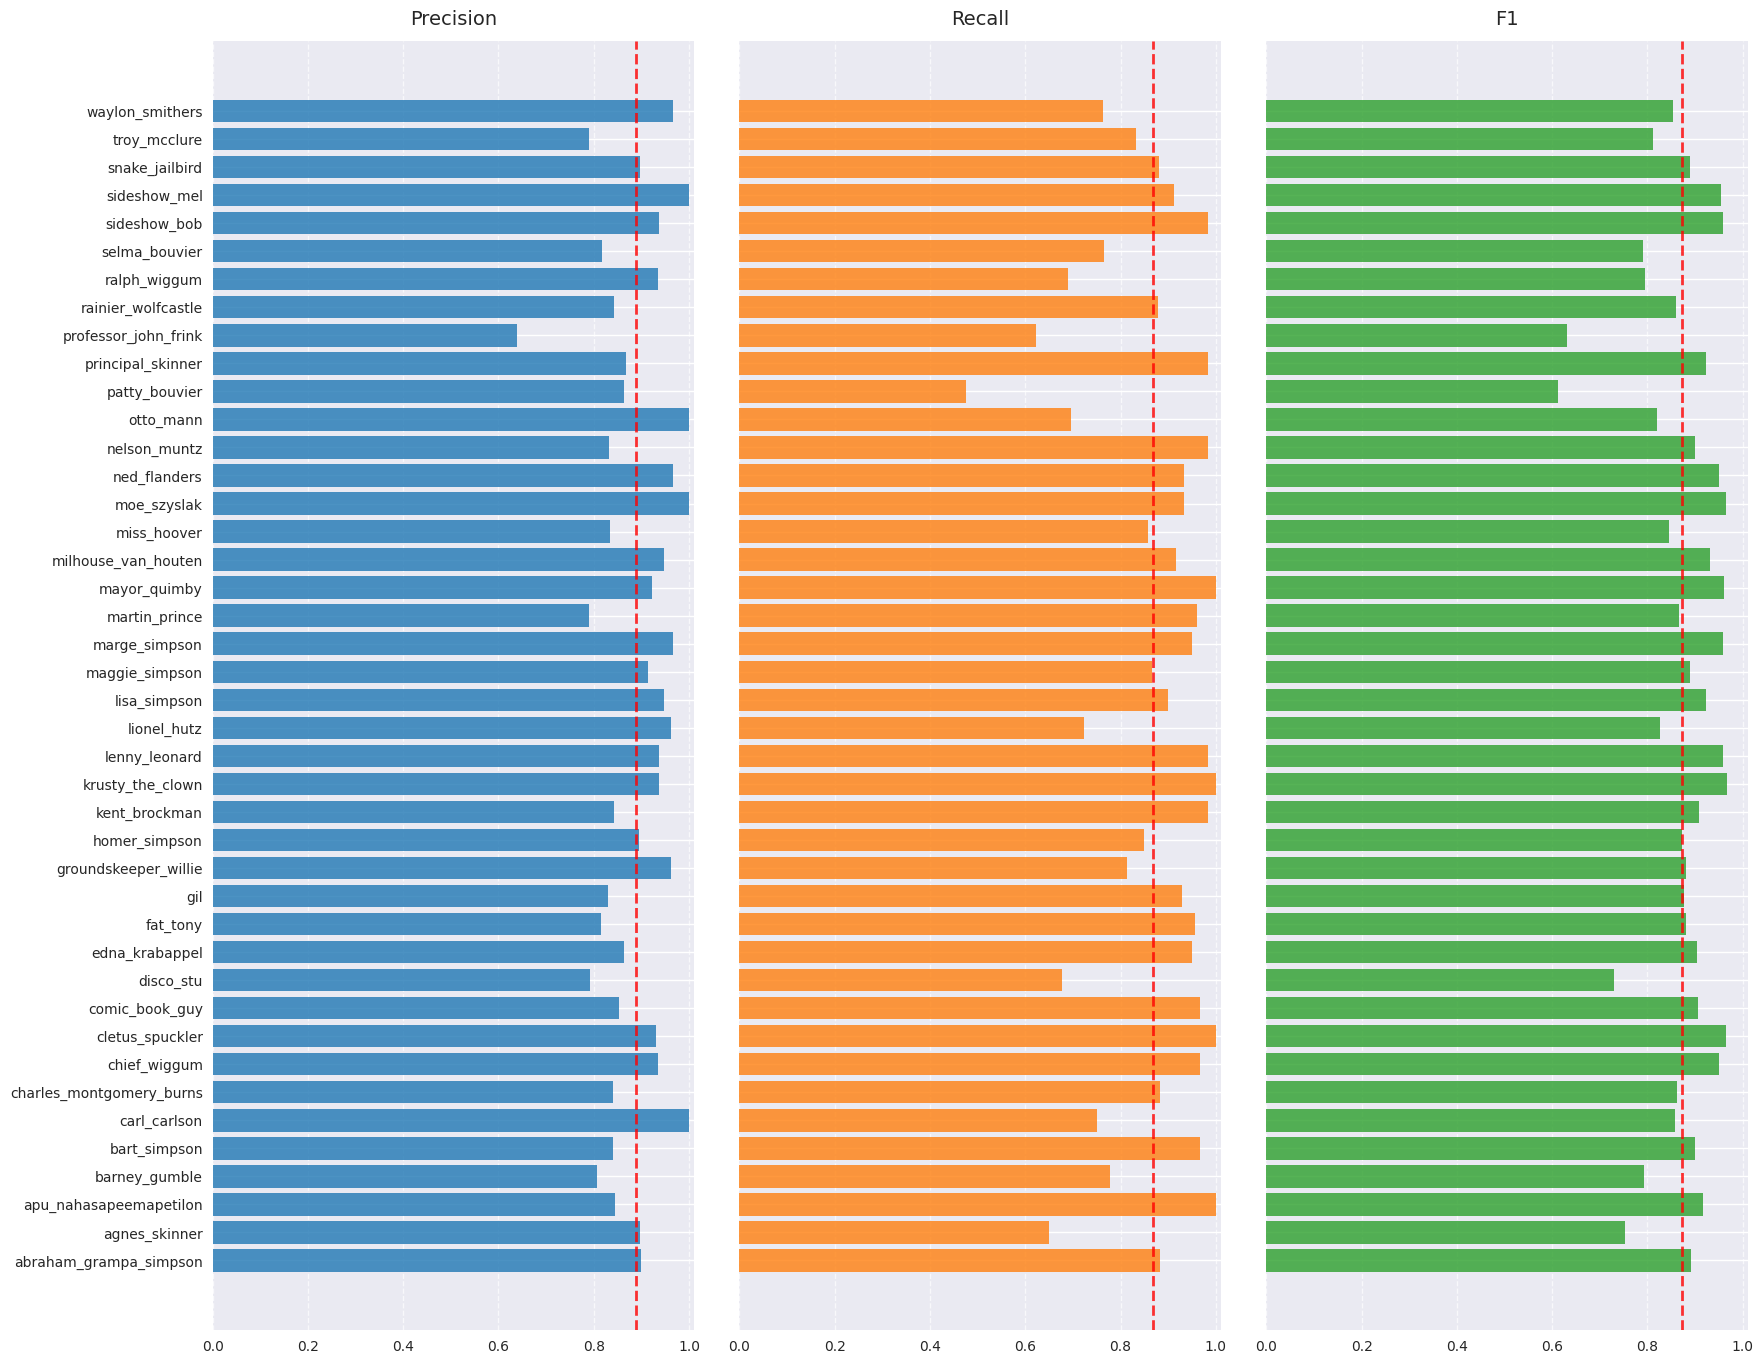

In [4]:
# Загрузка данных
df = pd.read_csv('../meta_data/test_metric.csv')
df['Class'] = df['Class'].astype(str)

# Вычисление средних значений
mean_precision = df['Precision'].mean()
mean_recall = df['Recall'].mean()
mean_f1 = df['F1'].mean()

plt.style.use('seaborn-v0_8')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig, axes = plt.subplots(1, 3, figsize=(18, 14))

for i, (ax, metric, color) in enumerate(zip(axes, ['Precision', 'Recall', 'F1'], colors)):
    bars = ax.barh(df['Class'], df[metric], color=color, alpha=0.8, height=0.8)
    
    mean_value = globals()[f'mean_{metric.lower()}']
    ax.axvline(mean_value, color='red', linestyle='--', linewidth=2, alpha=0.8)
    
    ax.set_xlim(0, 1.01)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_title(metric, fontsize=14, pad=12)
    
    if i == 0:
        ax.tick_params(axis='y', labelsize=10)
    else:
        ax.tick_params(axis='y', labelleft=False)

print(mean_value)

plt.tight_layout(pad=2.0)
plt.savefig('metrics_on_test.png', dpi=300, bbox_inches='tight')
plt.show()